In [1]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle
from pprint import pprint

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from tqdm import tqdm

# Custom modules (if needed)
# module_path = os.path.join(os.path.expanduser('~'), 'CustomModules')
# sys.path.append(module_path)
# from telegram_notify import notify
# from plotting_tools import error_band_plot, get_ax_data_range

# Add the parent directory to sys.path (if needed)
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

# Other modules (if needed)

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

jtplot.style(context='paper', theme='grade3', grid=False, ticks=True)
DFT_FIG_WIDTH_WIDE = 11
DFT_FIG_WIDTH = 5.3
COLORS = plt.get_cmap('tab10')
# Choose in ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 
# 'tab10', 'tab20', 'tab20b', 'tab20c']

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

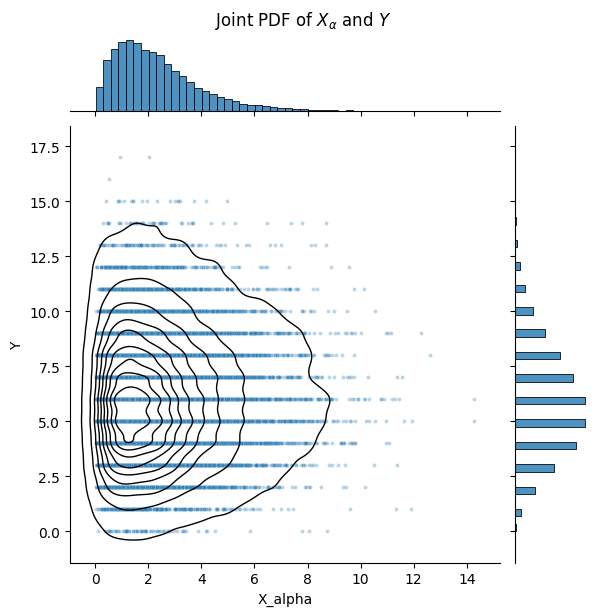

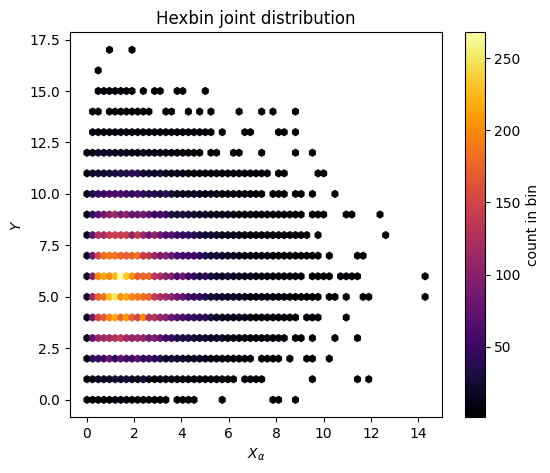

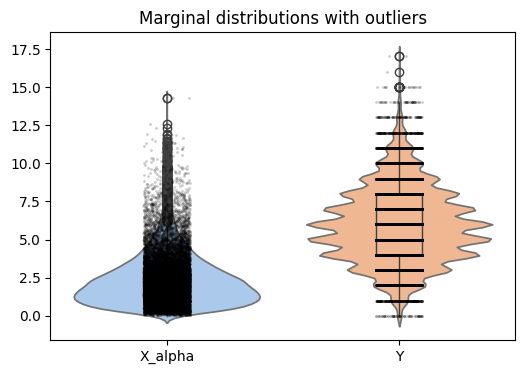

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시용 가짜 데이터 ─ 실제로는 시뮬레이션-결과로 얻은 X_alpha, Y 배열을 쓰면 돼
X_alpha = np.random.gamma(shape=2.0, scale=1.2, size=20_000)
Y = np.random.poisson(lam=6.0, size=20_000)
df = pd.DataFrame({"X_alpha": X_alpha, "Y": Y})

# 1) 공통 분포: scatter + KDE contour + 주변 histogram
g = sns.jointplot(
    data=df,
    x="X_alpha",
    y="Y",
    kind="scatter",
    s=8,
    alpha=0.3,
    color="tab:blue",
    marginal_kws={"bins": 50, "alpha": 0.8, "color": "tab:blue"},
)
sns.kdeplot(
    data=df,
    x="X_alpha",
    y="Y",
    levels=10,
    fill=False,
    thresh=0.02,
    linewidths=1,
    color="k",
    ax=g.ax_joint,
)
g.fig.suptitle(r"Joint PDF of $X_{\alpha}$ and $Y$", y=1.02)
plt.show()

# 2) 샘플이 너무 많거나 포인트 겹침이 심하면 hexbin이 깔끔해
plt.figure(figsize=(6, 5))
hb = plt.hexbin(df["X_alpha"], df["Y"], gridsize=60, cmap="inferno", mincnt=1)
plt.colorbar(hb, label="count in bin")
plt.xlabel(r"$X_{\alpha}$")
plt.ylabel("$Y$")
plt.title("Hexbin joint distribution")
plt.show()

# 3) 각 변수의 모양을 한눈에: violin / box / stripplot 조합
plt.figure(figsize=(6, 4))
sns.violinplot(data=df[["X_alpha", "Y"]], inner=None, palette="pastel")
sns.boxplot(
    data=df[["X_alpha", "Y"]], width=0.2, showcaps=False, boxprops={"facecolor": "none"}
)
sns.stripplot(data=df[["X_alpha", "Y"]], color="k", size=2, alpha=0.2)
plt.title("Marginal distributions with outliers")
plt.show()